# <center> <u> Pareto Distribution </u> </center> 

In [1]:
import numpy as np
import pandas as pd 

from numba import jit, prange
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

## <center> Set Seaborn Plot Theme </center> 

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "bright",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Generate Synthetic Data </center>

In [3]:
N = 10000
rv = np.random.gumbel(0, 1, N)

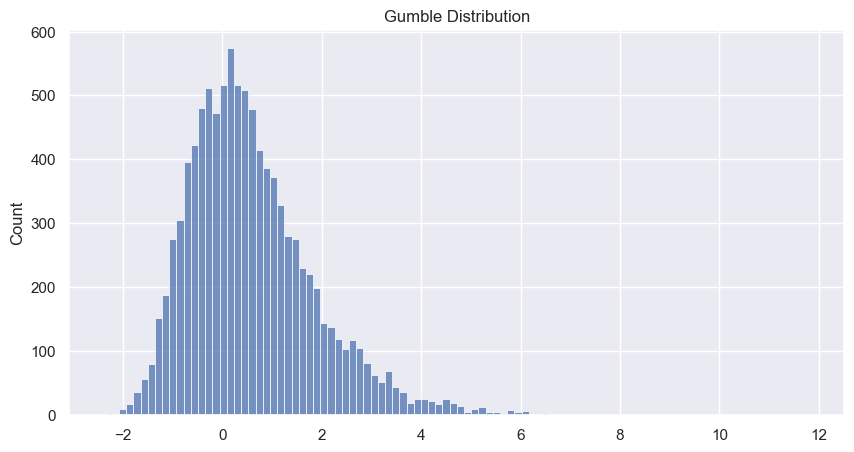

In [4]:
ax = sns.histplot(rv)

ax.set(
    title = "Gumble Distribution",
)

plt.show()

## <center> Generalized Pareto Distribution </center> 

## <center> $ Pr(X > x) = \begin{cases} 
                                        \frac{\alpha x_{m}^\alpha}{x^{\alpha + 1}} & \text{if } x \geq x_{m} \\ 
                                        0 & \text{if } x \lt x_{m} \\ 
                           \end{cases} $ </center> 

In [5]:
@jit(nopython = True)
def compute_pareto_distribution(alpha, x, xm):
    """
    
    """
    
    if x >= xm:
        return (alpha * xm**alpha) / (x**(alpha + 1))
    else:
        return 0

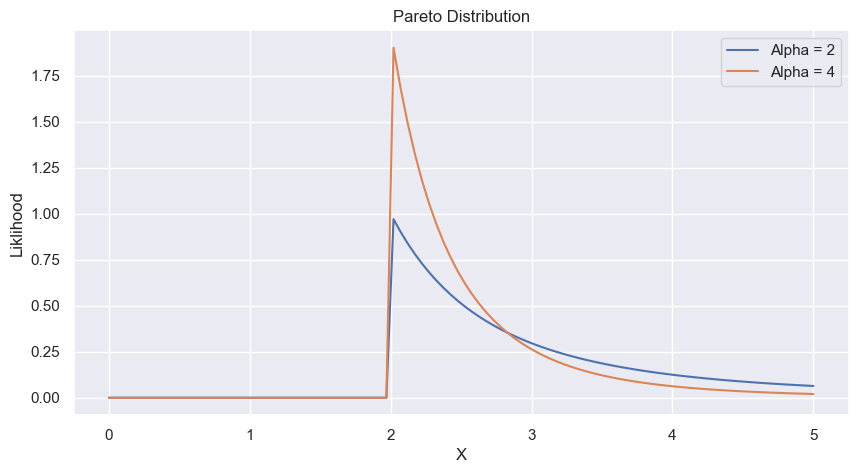

In [6]:
N = 100
x = np.linspace(0, 5, N)
xm = 2
pareto1 = np.zeros(N)
pareto2 = np.zeros(N)

for i in range(N):
    pareto1[i] = compute_pareto_distribution(2, x[i], xm)
    pareto2[i] = compute_pareto_distribution(4, x[i], xm)

ax = sns.lineplot(
    x = x, 
    y = pareto1,
    label = "Alpha = 2",
)

sns.lineplot(
    x = x,
    y = pareto2,
    label = "Alpha = 4",
)

ax.set(
    title = "Pareto Distribution",
    xlabel = "X",
    ylabel = "Liklihood",
)

plt.show()

## <center> Fit the Distribution Using Maximum Liklihood Estimation </center>

## <center> $ \hat{\alpha} =  \frac{n}{\sum_{i=0}^{n} ln(\frac{x_{i}}{\hat{x_m}}) } $ </center>

## <center> $ \sigma = \frac{\hat{\alpha}}{\sqrt{n}} $ </center>

In [7]:
@jit(nopython = True)
def compute_alpha(n, x, xm):
    """
    
    """  
    
    total = 0
    
    for i in range(n):
        total += np.log(x[i] / xm)
    
    alpha_hat = n / total
    
    return alpha_hat

In [8]:
@jit(nopython = True)
def compute_sigma(alpha, n):
    """
    
    """
    
    return alpha / np.sqrt(n)

In [9]:
xm = np.quantile(rv, 0.95)
print("Tail: ", xm)
data = []

for elem in rv:
    
    if elem > xm:
        data.append(elem)

data = np.array(data)
alpha_hat = compute_alpha(len(data), data, xm)
print("Alpha Hat: ", alpha_hat)

sigma_hat = compute_sigma(alpha_hat, len(data))
print("Sigma Hat: ", sigma_hat)

Tail:  2.957132531623606
Alpha Hat:  3.7622526356221853
Sigma Hat:  0.16825305283557906


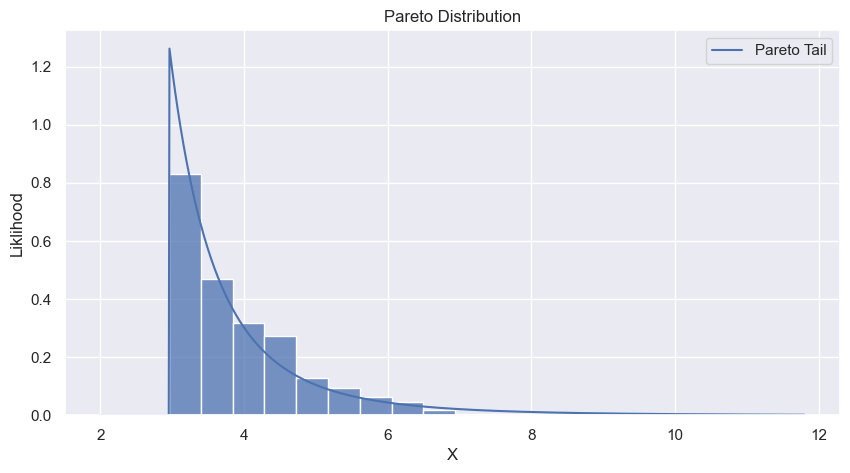

In [13]:
N = 1000
x = np.linspace(2, np.abs(np.max(data)), N)
pareto_fit = np.zeros(N)

for i in range(N - 1):
    pareto_fit[i] = compute_pareto_distribution(alpha_hat, x[i], xm)
        
ax = sns.lineplot(
    x = x,
    y = pareto_fit,
    label = "Pareto Tail",
)

sns.histplot(
    data,
    stat = "density",
    label = "Empirical Tail",
    bins = 20,
)

ax.set(
    title = "Pareto Distribution",
    xlabel = "X",
    ylabel = "Liklihood",
)

plt.show()